# Section 1 Linear Regression

## 1.1 the Normal Equation

In [1]:
# test the Normal Equation by Numpy

## import the lib
import numpy as np

## create a training instance array 
X = 2 * np.random.rand(100, 1)

## create a traininig target value array
y = 4 + 3 * X  + np.random.randn(100, 1)

## add a column of 1s to X
X_b = np.c_[np.ones((100, 1)), X]

## calculate the optimal theta
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

## print the result
print(theta_best)

[[3.69164567]
 [3.35047868]]


In [2]:
X_b.shape

(100, 2)

In [3]:
# create 2 new instances

X_new = np.array([[0], [2]])

In [4]:
X_new.shape

(2, 1)

In [5]:
# add the column of 1s to the X_new instances
X_new_b = np.c_[np.ones((2, 1)), X_new]

# predict the corresponding target values based on the trained theta
y_pred = X_new_b.dot(theta_best)

#print the results
print(y_pred)

[[ 3.69164567]
 [10.39260303]]


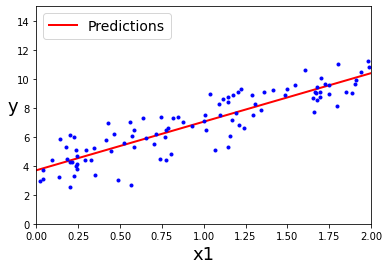

In [6]:
# plot the training results

## import the lib
from matplotlib import pyplot as plt

## plot the axis range
plt.axis([0, 2, 0, 15])

## plot x-axis label and y-axis label
plt.xlabel("x1", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)

## plot the fitted line
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Predictions")

## plot the training data 
plt.plot(X, y, "b.")

## create the legend
plt.legend(loc="upper left", fontsize=14)

## show the image
plt.show()

## 1.2 Linear Regression with Sklearn

### 1.2.1 Model creation and training

In [7]:
# create and train a Linear Regression model 

## import the lib
from sklearn.linear_model import LinearRegression

## create a class object
lin_reg = LinearRegression()

## fit the model with training instances and training target values
lin_reg.fit(X, y)

## output the intercept (bias) and the cofficients
print("The bias is: {}".format(lin_reg.intercept_))
print("The coefficient is: {}".format(lin_reg.coef_))

The bias is: [3.69164567]
The coefficient is: [[3.35047868]]


In [8]:
type(lin_reg.intercept_)
type(lin_reg.coef_)

numpy.ndarray

In [9]:
lin_reg.intercept_.shape

(1,)

In [10]:
lin_reg.coef_.shape

(1, 1)

### 1.2.2 Methods for obtaining the Best Theta

#### 1.2.2.1 lin_reg, the sklearn model method

#### 1.2.2.2 numpy least square method

In [11]:
# import the lib
import numpy as np

# take the first element of the method returned tuple 
theta_best_svd = np.linalg.lstsq(X_b, y, rcond=1e-6)[0]

#print the result
print(theta_best_svd)

[[3.69164567]
 [3.35047868]]


#### 1.2.2.3 by definition

#### 1.2.2.4 pseudo-inverse of X 

In [12]:
# import the lib
import numpy as np

theta_best_pdinv = np.linalg.pinv(X_b).dot(y)

print(theta_best_pdinv)

[[3.69164567]
 [3.35047868]]


# Section 2 Gradient Descent

## 2.1 Batch Gradient Descent

In [13]:
# the implementation of Batch Gradient Descent algorithm

## import the lib
import numpy as np

## define all the constants
eta = 0.1
n_iterations = 100
m = 100

## random initialisation of theta
theta = np.random.randn(2, 1)

print("the initialised theta is: {}".format(theta))

## iterations of update
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

## print the result
print("the updated theta with learn rate of 0.1 after 100 iterations is: {}".format(theta))

the initialised theta is: [[0.42310658]
 [0.04871294]]
the updated theta with learn rate of 0.1 after 100 iterations is: [[3.68423415]
 [3.35700314]]


## 2.2 Stochastic Gradient Descent

### 2.2.1 SGD implementation

In [15]:
# the implementation of Stochastic Gradient Descent

## import the lib
import numpy as np

## define the variables 
n_epochs = 50
t0, t1 = 5, 50
m = 100

## define the learning schedule function
def learning_schedule(t):
    
    return t0 / (t + t1)

## random initialisation of the parameters theta
theta = np.random.randn(2, 1)

print("The initialised theta is: {}".format(theta))

## updating loop
for epoch in range(n_epochs):
    
    for i in range(m):
        
        # randomly select one instance 
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index: random_index + 1]
        
        # obtain the gradient 
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        
        # obtain the learning rate, eta, by running the learning schedule function
        eta = learning_schedule(epoch * m + i)
        
        # update the theta
        theta = theta - eta * gradients

print("The optimised theta is: {}".format(theta))
        

The initialised theta is: [[-0.65441767]
 [ 0.87762931]]
The optimised theta is: [[3.6259285 ]
 [3.37158121]]


### 2.2.2 SGD by Scikit-Learning

In [16]:
# import the lib
from sklearn.linear_model import SGDRegressor

# create the class object
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

# fit 
sgd_reg.fit(X, y.ravel())

print("The bias is: {}".format(sgd_reg.intercept_))
print("The coefficients include: {}".format(sgd_reg.coef_))

The bias is: [3.64356317]
The coefficients include: [3.31849478]


## 2.3 Mini-Batch Gradient Descent

# Section 3 Polynomial Regression

## 3.1 nonlinear data creation

In [1]:
# generate nonlinear data

## import the lib
import numpy as np

## define the number of data instances
m = 100

## obtain the training instaces and the training target values
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

<AxesSubplot:xlabel='0', ylabel='1'>

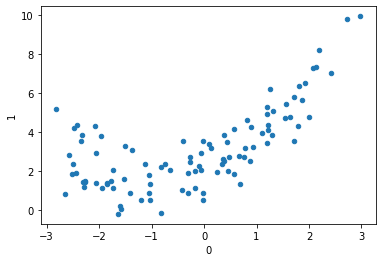

In [2]:
# display the data in image
import pandas as pd

data_array = np.c_[X, y]
data = pd.DataFrame(data_array)
data.plot(kind="scatter", x=0, y=1)

## 3.2 pre-process the data 

In [3]:
# import the lib

from sklearn.preprocessing import PolynomialFeatures

In [4]:
# create the class object of pre-processor

poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [5]:
# fit and transform

X_poly = poly_features.fit_transform(X)

In [6]:
# print one of the processed training instance

print(X_poly[0])

[0.3721123  0.13846757]


## 3.3 Linear Regression model with the pre-processed data

In [7]:
# import the lib
from sklearn.linear_model import LinearRegression

# create the class object of the regressor
lin_reg = LinearRegression()

# fit
lin_reg.fit(X_poly, y)

# print the bias intercept and the weight coefficients
print("The bias intercept is: {}".format(lin_reg.intercept_))
print("The weight coefficient array includes: {}".format(lin_reg.coef_))

The bias intercept is: [2.10280996]
The weight coefficient array includes: [[1.09884606 0.5319493 ]]


# Section 4 Learning Curve

## 4.1 plain Linear Regression model

In [8]:
# import the libs

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

In [9]:
# define the learning curve plotting function

def plot_learning_curve(model, X, y):
    
    # split the training data and training target values for validation set
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    
    # create list structures for stroing training errors (MSE) and the validation errors (MSE)
    train_errors, val_errors = [], []
    
    # loop for all the training-size folds for storing the RMSEs
    for m in range(1, len(X_train)):
        
        # obtain the training error and validation error of a single fold
        
        ## fit the model 
        model.fit(X_train[:m], y_train[:m])
        
        ## obtain the training error
        y_train_predict = model.predict(X_train[:m])
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        
        ## obtain the validation error
        y_val_predict = model.predict(X_val)
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation")
    plt.legend(loc="upper right", fontsize=16)
    plt.xlabel("Training set size", fontsize=16)
    plt.ylabel("RMSE", fontsize=16)
    
        

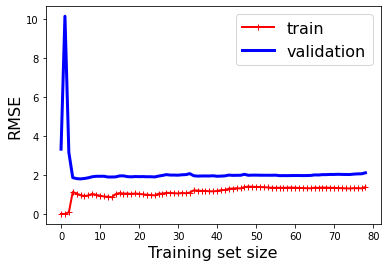

In [10]:
# plot the Learning Curve for the Linear Regression model

## import the libs 
from sklearn.linear_model import LinearRegression

## create the model class object
lin_reg = LinearRegression()

## run the defined function to show the Learning Curve
plot_learning_curve(lin_reg, X, y)

## 4.2 10th-Degree Polynomial Regression model

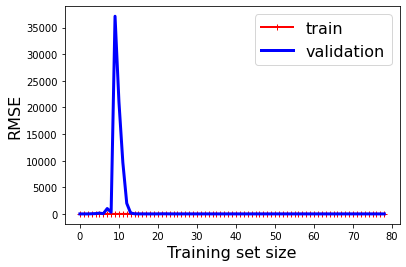

In [11]:
# import the libs
from sklearn.pipeline import Pipeline

# pre-process the model
polynomial_regression = Pipeline([
    ("Poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
]) 

# run the defined Learning Curve function
plot_learning_curve(polynomial_regression, X, y)

# Section 5 Regularised Linear Models

## 5.1 Ridge Regression

In [1]:
# create training data and training targets

## import the lib
import numpy as np

## specify the random seed
np.random.seed(42)

## create training instances
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [2]:
# import the lib
from sklearn.linear_model import Ridge

# create model class object
ridge_reg = Ridge(alpha=1, solver="cholesky")

# fit 
ridge_reg.fit(X, y)

# predict a new instance
ridge_reg.predict([[1.5]])

array([[1.55071465]])

## 5.2 Lasso Regression

In [3]:
# import the lib
from sklearn.linear_model import Lasso

# create the model class object 
lasso_reg = Lasso(alpha=0.1)

# fit
lasso_reg.fit(X, y)

# predict
lasso_reg.predict([[1.5]])

array([1.53788174])

## 5.3 Elastic Net

In [4]:
# import the lib
from sklearn.linear_model import ElasticNet

# create the model class object
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)

# fit
elastic_reg.fit(X, y)

# predict
elastic_reg.predict([[1.5]])

array([1.54333232])

## 5.4 Early Stopping

In [4]:
# import the libs

import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone

In [82]:
# create the training data

## set the random seed
# np.random.seed(42)

## obtain training instances
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X  + 0.5 * X**5 + np.random.randn(m, 1)

## obtain the validation set
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [83]:
# pre-process the features with pipeline

## create the scaler object
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("std_scaler", StandardScaler())
])

## fit 
poly_scaler.fit(X_train)

## transform 
X_train_poly_scaled = poly_scaler.transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [84]:
# Create the SGD regressor model 

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005,
                      random_state=42)

In [85]:
# initialise the variables

minimum_val_error = float("inf")
best_epoch = None
best_model = None

In [86]:
# loop all the epochs for the best model and best epoch

for epoch in range(10000):
    
    ## fit the SGD regressor
    sgd_reg.fit(X_train_poly_scaled, y_train)
    
    ## obtain the validation value
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    
    ## obtain the validation error
    val_error = mean_squared_error(y_val, y_val_predict)
    
    ## conditions 
    if val_error < minimum_val_error:
        
        ## assign the obtained validation error to the minimum validation error
        minimum_val_error = val_error
        
        ## assign the epoch to the best epoch
        best_epoch = epoch
        
        ## assign the model to the best model
        best_model = clone(sgd_reg)

In [87]:
print(best_epoch, best_model)

2005 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)


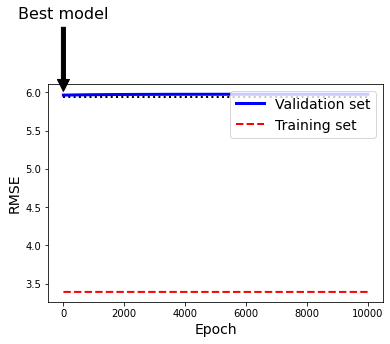

In [88]:
# plot the result

from matplotlib import pyplot as plt

n_epochs = 10000
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

# Section 6 Logistic Regression

## Iris Dataset

### Load the data

In [1]:
# import the lib
from sklearn import datasets

# create the data structure 
iris = datasets.load_iris()

In [2]:
print(type(iris))

<class 'sklearn.utils.Bunch'>


### have a look at the dataset

In [7]:
# have a look at the dataset

## import the lib
import numpy as np

print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
# check Attribute "data"

print(iris['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
print(type(iris['data']))


<class 'numpy.ndarray'>


In [10]:
# create training instances and binary classification labels of Iris-Virginica

X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int64)

### train a Logistic Regression model

In [11]:
# import the lib
from sklearn.linear_model import LogisticRegression

# create the model object
log_reg = LogisticRegression()

# fit
log_reg.fit(X, y)

LogisticRegression()

### Predicted Probabilities 

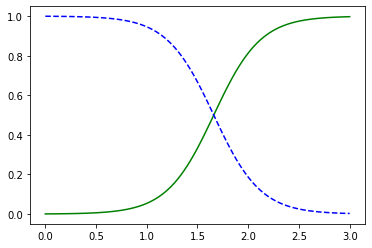

In [12]:
# import the lib
from matplotlib import pyplot as plt

# create new random instances
X_new = np.linspace(0, 3, 100).reshape(-1, 1)

# obtain the predicted probabilities
y_proba = log_reg.predict_proba(X_new)

# plot 
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
